# THE SPARKS FOUNDATION - DATA SCIENCE & BUSINESS ANALYTICS

# Author(Done By) - Ritwik Ganguly


#### My LinkedIn I'd: www.linkedin.com/in/ritwik-ganguly-148aa2203

# Task-2:- Prediction Using Unsupervised Machine Learning¶

#### 1) From the given "Iris" dataset, predict the optimum number of clusters and represent it visually. 2) Dataset link: https://bit.ly/3kXTdox

## K-Means

1) K-Means Clustering is an Unsupervised Learning Algorithm, which groups the unlabeled dataset into different clusters. It is a distance based algorithm, where we calculate the distances to point to a cluster. 
2) In K-Means each cluster is associated with a centroid.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Data Analysis

In [2]:
# Print the total Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
# All columns name of the dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# The Statistical Description of Iris Dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Print top 10 data
print(iris_df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


## Determining The Optimal Number of Clusters Using Elbow Method

C:\Users\RITWIK GANGULY\anaconda3\envs\Ritwik_DATA_Sci\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


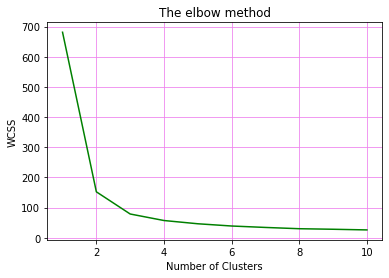

In [6]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

# Importing the necessary library
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
                   
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, color = "green")
plt.grid(color = "violet")
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


The Elbow Method:- In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

#### Answer:- From the above graph we can see that the elbow occurs at k = 3 i.e. the number of cluster is 3.

## Creating The K-Means Classifier

In [7]:
# Applying K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
                    
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Plotting The Clusters

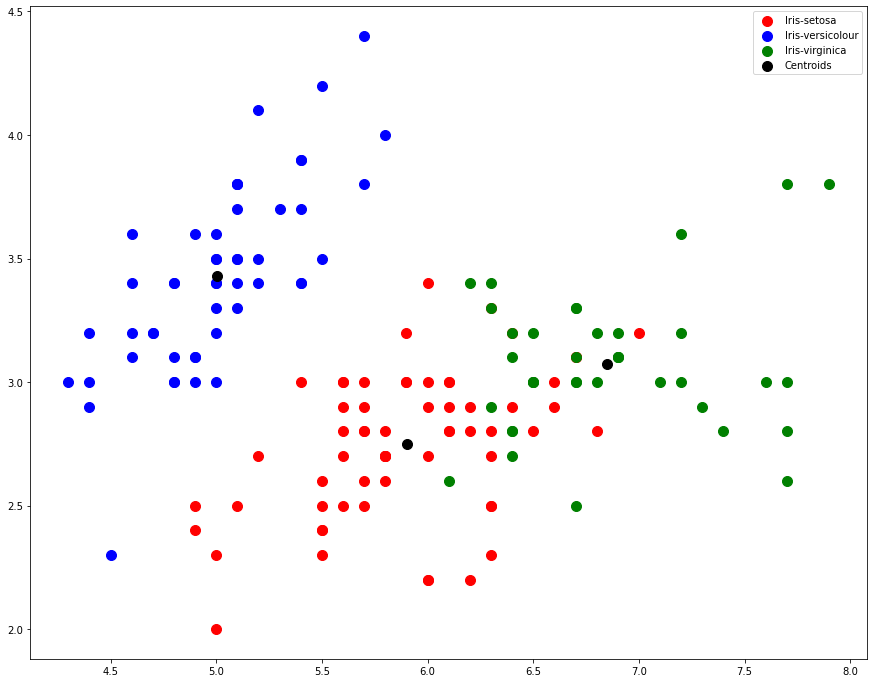

In [8]:
# Visualising the Clusters
plt.figure(figsize=(15, 12))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
            
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
           
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
            

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
            

plt.legend()
plt.show()

#### The above plot shows that the clusters present in the given dataset among the species Setosa, Versicolour, Virginica.

## 3D Scatterplot Using Matplotlib

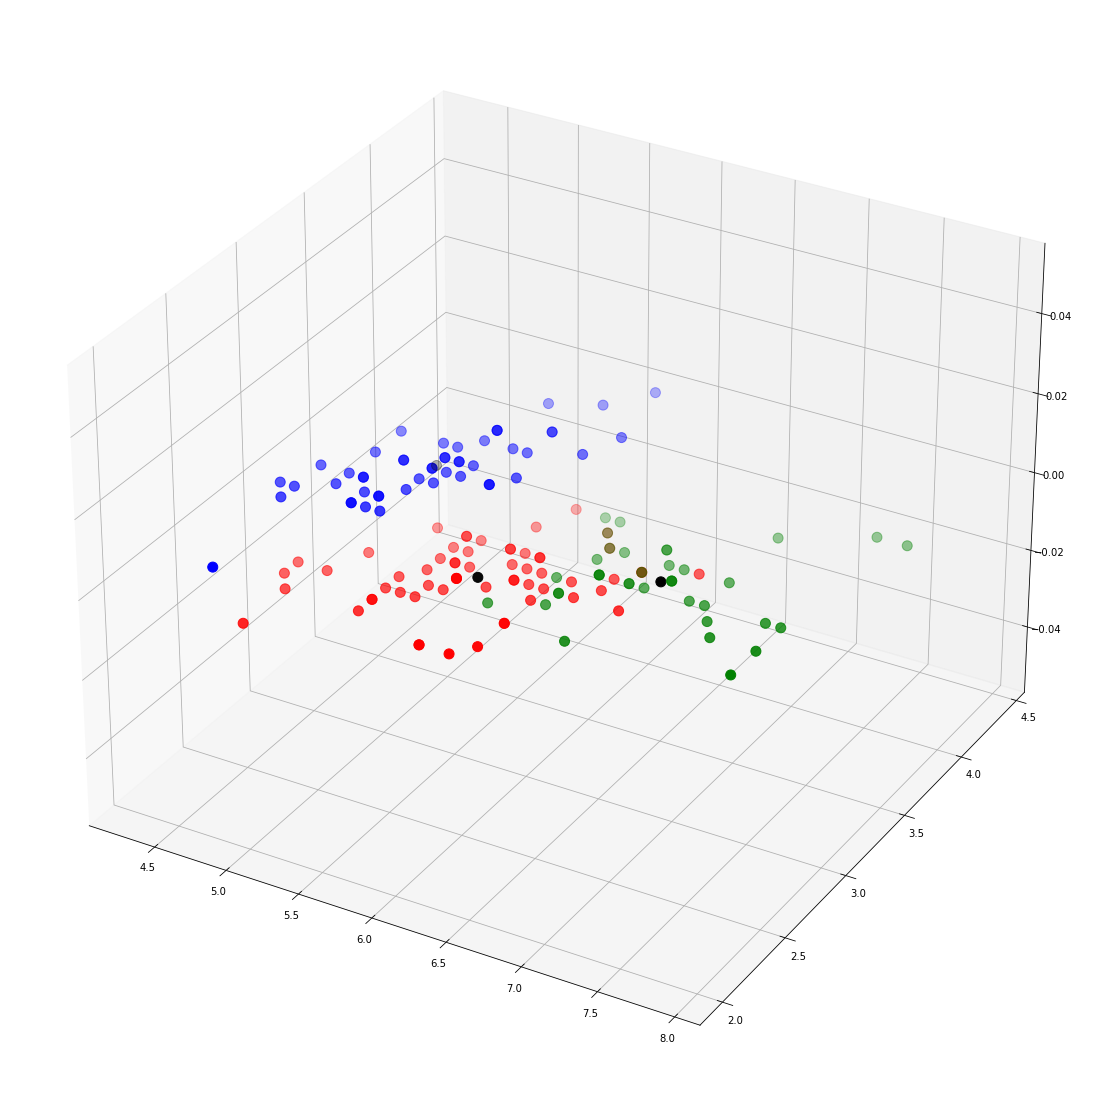

In [9]:
fig = plt.figure(figsize= (20, 20))
ax = fig.add_subplot(111, projection = "3d")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
            
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
           
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
            

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()

## Labelling The Predictions

In [14]:
# Assuming
# "0" refers to "Iris-setosa"
# "1" refers to "Iris-versicolour"
# "2" refers to "Iris-virginica".
y_Kmeans = np.where(y_Kmeans == "0", "Iris-setosa", y_Kmeans)
y_Kmeans = np.where(y_Kmeans == "1", "Iris-versicolour", y_Kmeans)
y_Kmeans = np.where(y_Kmeans == "2", "Iris-virginica", y_Kmeans)
y_Kmeans

array(['Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolour',
       'Iris-versicolour', 'Iris-versicolour', 'Iris-versicolo

## Adding the Prediction to the Dataset

In [15]:
data_with_cluster = iris_df.copy()
data_with_cluster["Cluster Info"] = y_Kmeans
# Cluster data information from the top 10
print("Top 10 data......................................................................")
print(data_with_cluster.head(10))
# Cluster data information from the last 10
print("Last 10 data.....................................................................")
print(data_with_cluster.tail(10))

Top 10 data......................................................................
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

       Cluster Info  
0  Iris-versicolour  
1  I

## Data Visualisation

### Barplot & Clauster Distribution

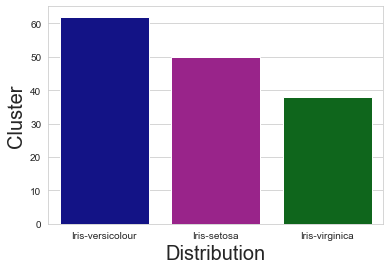

In [16]:
# Bar-Plot
sns.set_style("whitegrid")
sns.barplot(x = data_with_cluster["Cluster Info"].unique(),
            y = data_with_cluster["Cluster Info"].value_counts(),
            palette = sns.color_palette(["#000099", "#AD1099", "#007412"]))
plt.xlabel("Distribution", fontsize = 20)
plt.ylabel("Cluster", fontsize = 20)
plt.show()

#### Bar-Plot Conclusion:-

From the above bar-plot there are approx 50 Iris-setosa, approx 62 Iris-versicolour and approx 38 Iris-virginica.

## Violin Plot

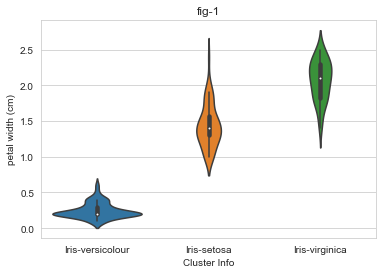

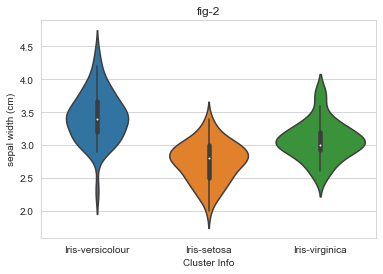

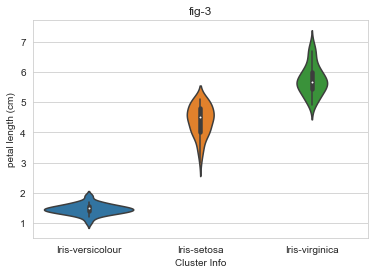

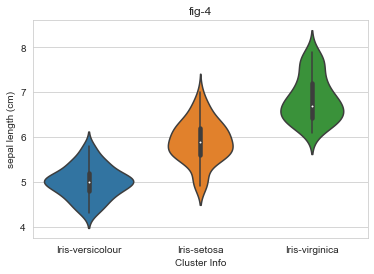

In [17]:
# Plotting Violin Graph
a = sns.violinplot(x = "Cluster Info", y = "petal width (cm)", data = data_with_cluster)
a.set_title("fig-1")
plt.show()

b = sns.violinplot(x = "Cluster Info", y = "sepal width (cm)", data = data_with_cluster)
b.set_title("fig-2")
plt.show()

c = sns.violinplot(x = "Cluster Info", y = "petal length (cm)", data = data_with_cluster)
c.set_title("fig-3")
plt.show()

d = sns.violinplot(x = "Cluster Info", y = "sepal length (cm)", data = data_with_cluster)
d.set_title("fig-4")
plt.show()


# Thank You.........

# Have A Good Day..........